In [231]:
import numpy as np
import matplotlib.pylab as plt
import statsmodels.api as sm
import plotly.express as px
import pandas as pd
pd.options.plotting.backend = "plotly"

In [354]:
ticker_and_weights["ticker"].values

array(['AMZN', 'CHWY', 'CRWD', 'DDOG', 'DOCU', 'FIVN', 'FRPT', 'ITB',
       'LULU', 'NET', 'NIO', 'NVDA', 'OKTA', 'PBW', 'PTON', 'RH', 'ROKU',
       'SE', 'SHOP', 'SNAP', 'SPOT', 'SQ', 'TRUP', 'TSM', 'TTD', 'TWLO',
       'W', 'ZG', 'ZM', 'ZS'], dtype=object)

In [500]:
market_factor = yf.download('SPY')["Adj Close"]["2019-8-01":].pct_change()[1:]
momentum_factor = yf.download('MTUM')["Adj Close"]["2019-8-01":].pct_change()[1:]
value_factor = yf.download('VLUE')["Adj Close"]["2019-8-01":].pct_change()[1:]
qual_factor = yf.download('QUAL')["Adj Close"]["2019-8-01":].pct_change()[1:]
growth_factor = yf.download('IWF')["Adj Close"]["2019-8-01":].pct_change()[1:]
tech_factor = yf.download('XLK')["Adj Close"]["2019-8-01":].pct_change()[1:]
from io import StringIO
ticker_and_weights = pd.read_csv(StringIO('''
ticker,weight
AMZN,0.06249
CHWY,0.02245
COUP,0.00244
CRSP,0.00523
CVNA,0.00116
DDOG,0.00388
FIVN,0.01415
FRPT,0.03935
ISRG,0.06405
ITB,0.05538
LULU,0.03626
NET,0.02222
NIO,0.00704
NVDA,0.03966
OKTA,0.01644
PBW,0.03623
PRLB,0.0303
RH,0.01093
ROKU,0.00665
RWM,0.11684
SE,0.00128
SNAP,0.02478
SPOT,0.01901
SQQQ,0.17485
TRUP,0.01767
TSLA,0.02305
TTD,0.00188
TXG,0.02812
UBER,0.03424
VEEV,0.03335
W,0.00949
WORK,0.01198
ZG,0.02716
    ''')).set_index("ticker")
stocks = yf.download(" ".join(ticker_and_weights.index.values))["Adj Close"]["2019-8-01":].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  33 of 33 completed


In [506]:
ticker_and_weights

,weight
ticker,
AMZN,0.06249
CHWY,0.02245
COUP,0.00244
CRSP,0.00523
CVNA,0.00116
DDOG,0.00388
FIVN,0.01415
FRPT,0.03935
ISRG,0.06405


In [501]:
portfolio_performance = ((ticker_and_weights.to_dict()["weight"]*stocks).sum(axis=1))
(portfolio_performance+1).cumprod().plot()


In [502]:
#xs = sm.add_constant(np.column_stack([market_factor.values, tech_factor.values, momentum_factor.values]), prepend=False)
xs = sm.add_constant(np.column_stack([
    market_factor.values, 
#     tech_factor.values, 
#     growth_factor.values, 
#     momentum_factor.values,
#     value_factor.values, 
#     qual_factor.values
]), prepend=False)

In [503]:

from statsmodels.regression.rolling import RollingOLS
rlm_model = RollingOLS(portfolio_performance, xs, window=90)
rlm_results = rlm_model.fit()

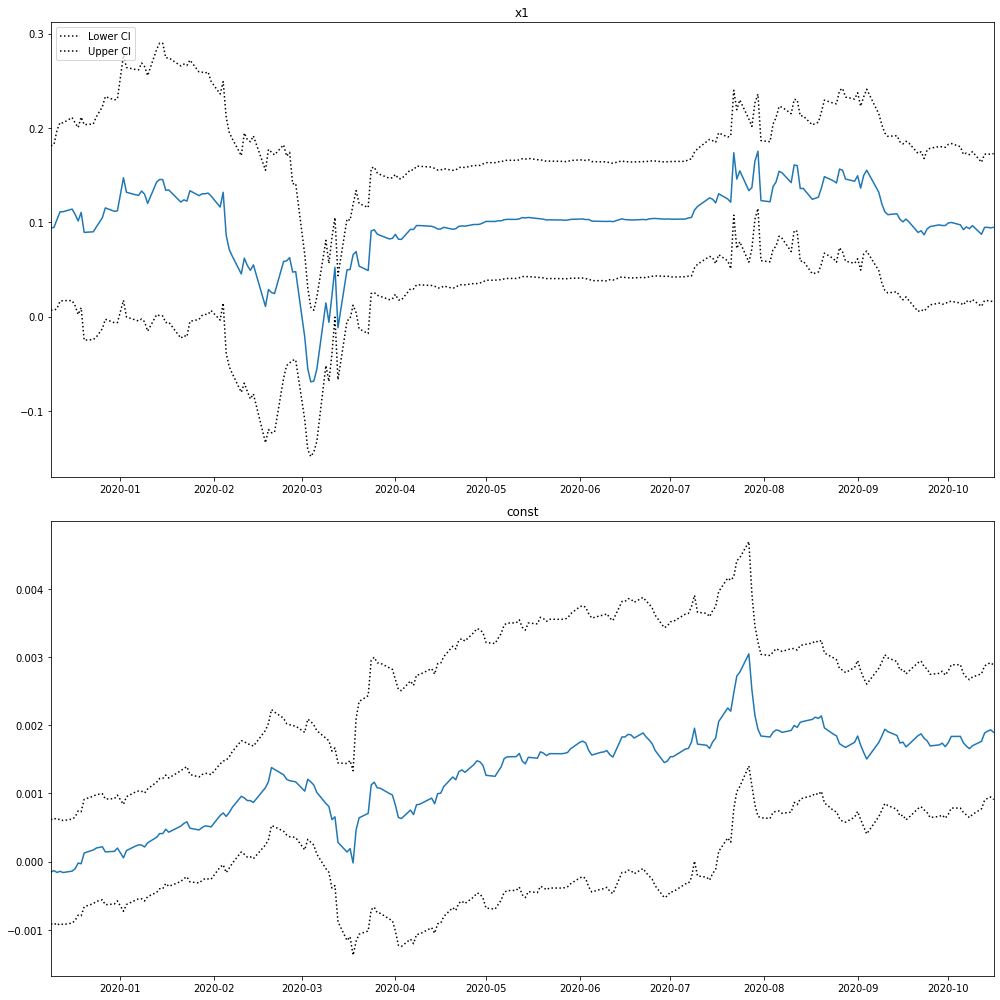

In [504]:
fig = rlm_results.plot_recursive_coefficient(variables=['x1', 'const'], figsize=(14,14))

In [505]:
rlm_results.rsquared_adj.plot()